<a href="https://colab.research.google.com/github/Wondupper/Sklearn-MLP/blob/main/Sklearn_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Изучите возможности классификации с помощью многослойного персептрона MLPClassifier.

Используя наборы данных с цифрами:

а) небольшой встроенный набор, загружаемый с помощью
X, y = datasets.load_digits(return_X_y=True)
и

б) MNIST, его можно загрузить по-разному, например, как в этом примере:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

продемонстрируйте:

(+) (+) 1) обучение и работу многоклассовой классификации,

(+) (+) 2) бинарной классификации на чётные и нечётные цифры,

(+) (+) 3) бинарной классификации на '0' и остальные цифры (приведите примеры, когда классификатор ошибается),

(+) (+) 4) проиллюстрируйте советы по использованию (например, для первого совета можно на маленьком наборе цифр сравнить результаты без нормализации, с использованием MinMaxScaler и с использованием StandardScaler).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import fetch_openml

In [ ]:
def incorrect_indices_show(i, X_test, y_test, y_pred,sh):
    incorrect_indices = np.where((y_test == i) & (y_pred != i))[0]
    for j in incorrect_indices[:5]:
        plt.imshow(X_test[j].reshape(sh, sh), cmap='gray')
        plt.title(f'True: {y_test[j]}, Pred: {y_pred[j]}')
        plt.axis('off')
        plt.show()

def correct_matrix_show(X_test, y_test, y_pred):
    fig, axes = plt.subplots(4, 10, figsize=(20, 10))
    for ax, image, label, pred in zip(axes.ravel(), X_test, y_test, y_pred):
        ax.imshow(image.reshape(8, 8), cmap='gray')
        ax.set_title(f'True: {label}, Pred: {pred}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

#Первый набор данных

In [ ]:
X, y = datasets.load_digits(return_X_y=True)

1) обучение и работу многоклассовой классификации,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 82)

In [ ]:
clf = MLPClassifier(max_iter = 300, random_state = 82)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=82)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.92      1.00      0.96        55
           2       1.00      0.98      0.99        52
           3       1.00      0.95      0.97        57
           4       0.98      1.00      0.99        41
           5       0.97      0.98      0.97        57
           6       1.00      1.00      1.00        50
           7       0.92      0.98      0.95        49
           8       0.96      0.89      0.92        61
           9       0.96      0.94      0.95        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [ ]:
print(confusion_matrix(y_test, y_pred)) # Добавить с какими цифрами она путается

[[63  0  0  0  1  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  1  0  0]
 [ 0  0  0 54  0  1  0  2  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  1]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 1  5  0  0  0  1  0  0 54  0]
 [ 0  0  0  0  0  0  0  1  2 51]]


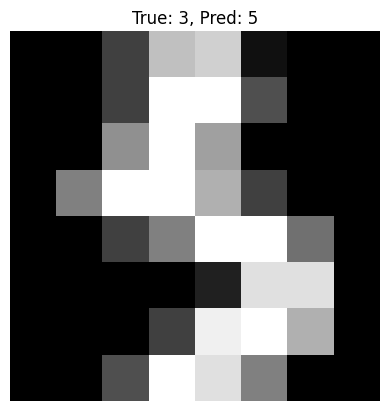

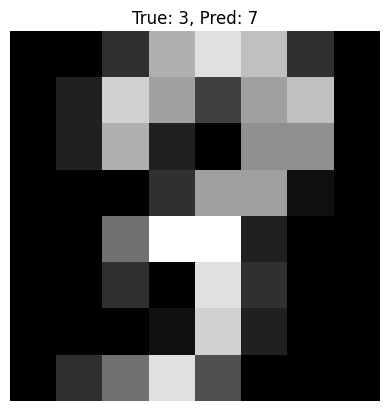

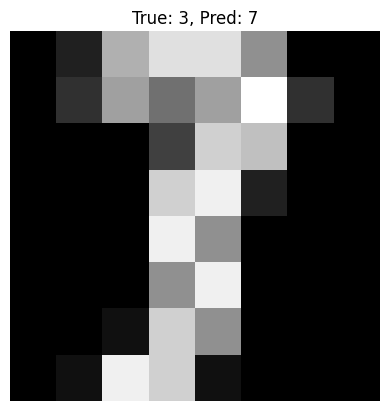

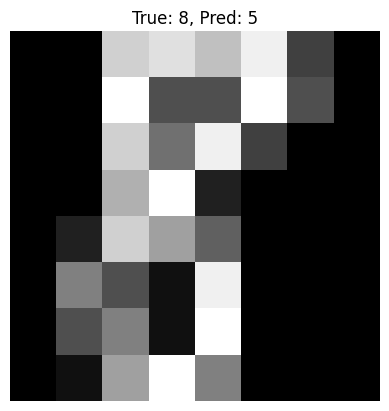

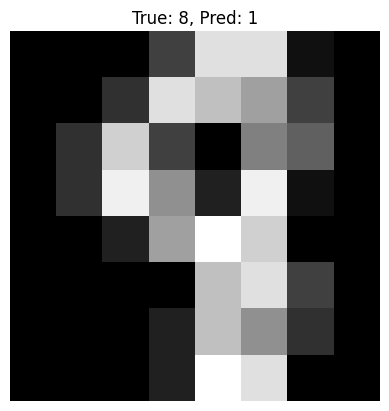

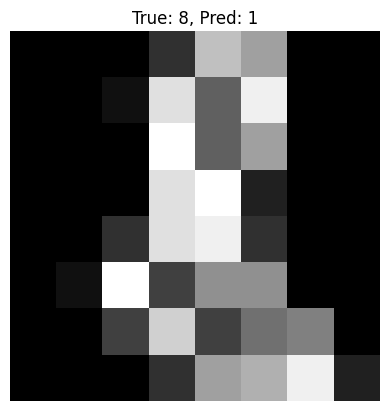

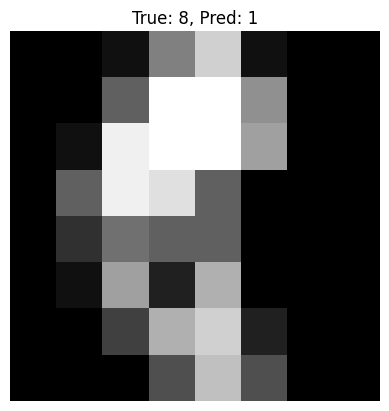

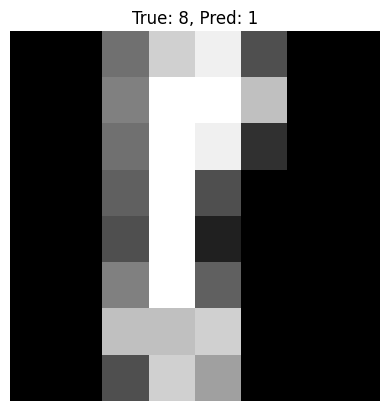

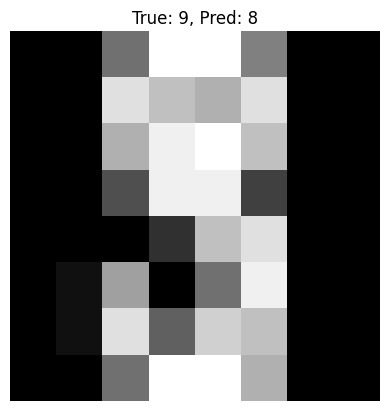

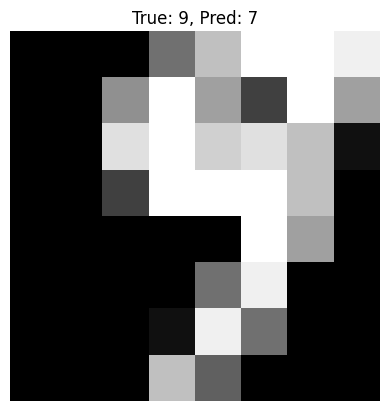

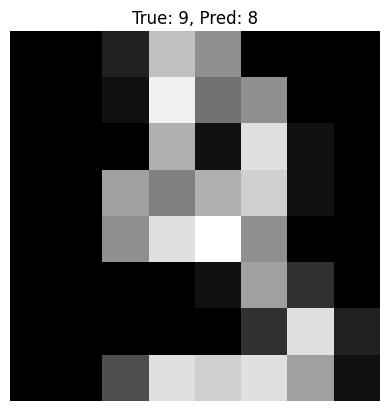

In [ ]:
for i in [3,8,9]:
  incorrect_indices_show(i,X_test,y_test, y_pred,8)

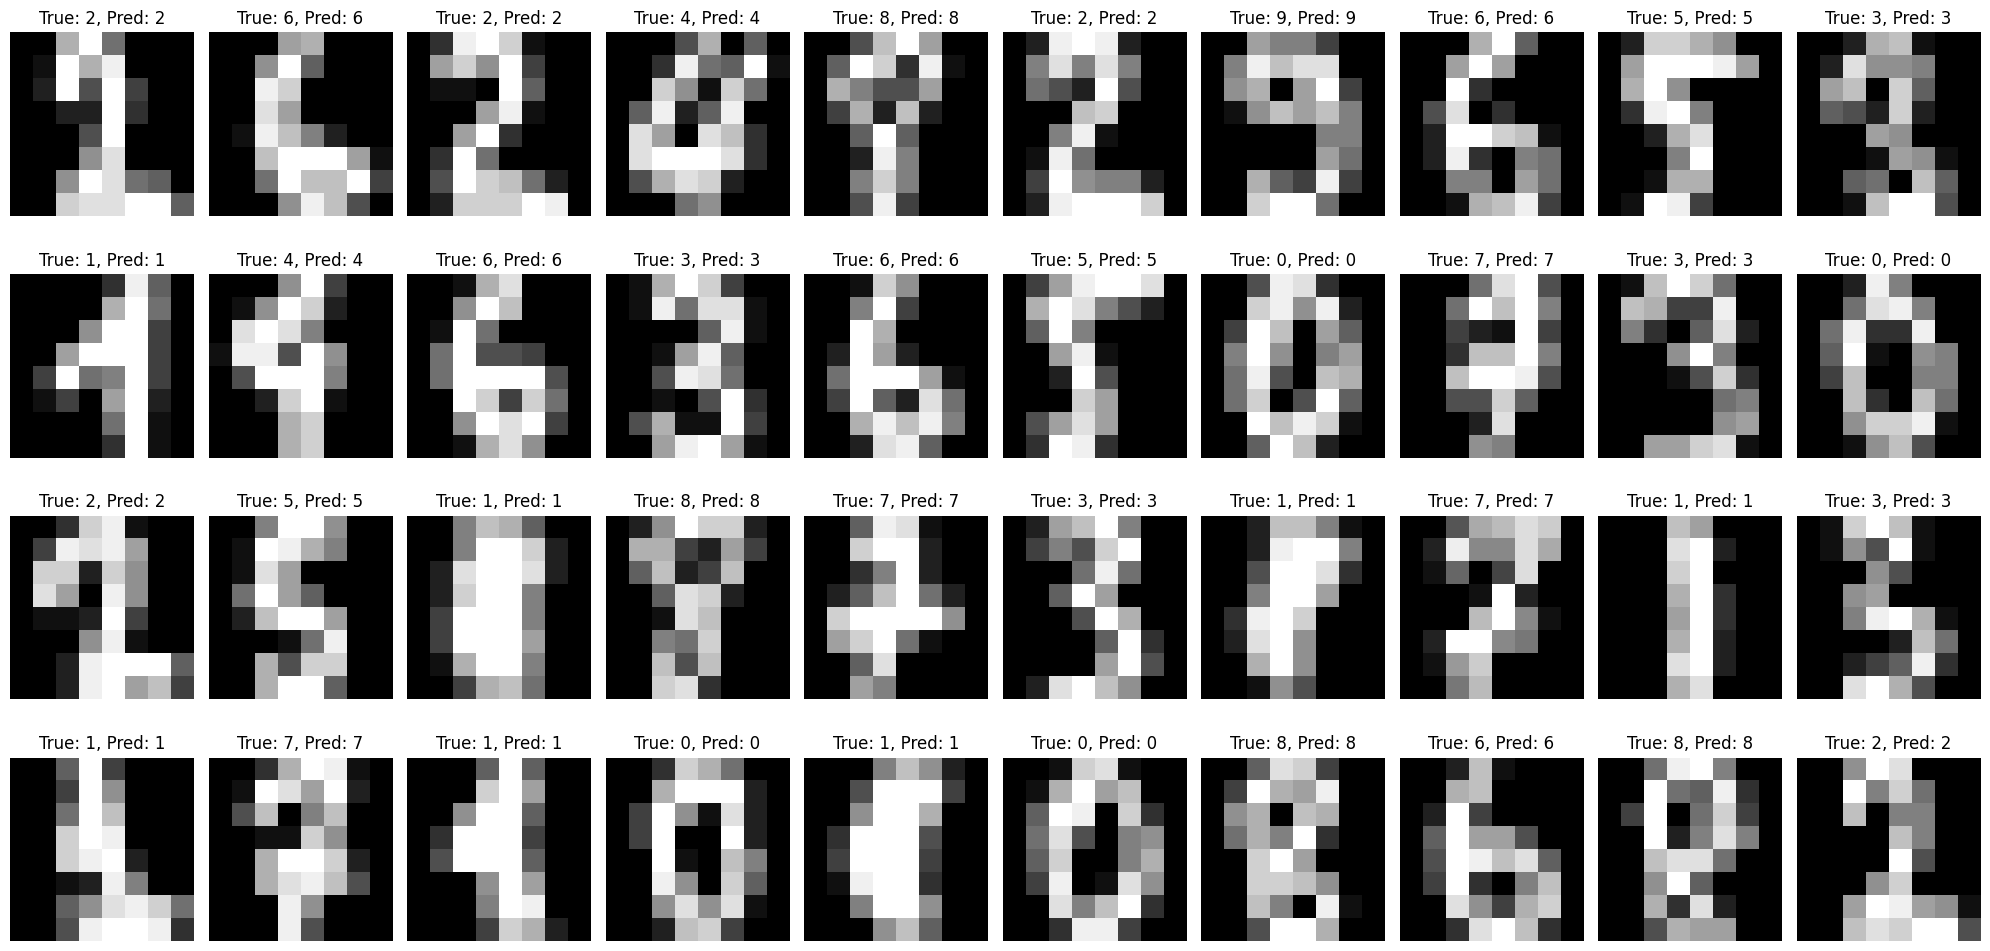

In [ ]:
correct_matrix_show(X_test, y_test, y_pred)

2) бинарной классификации на чётные и нечётные цифры,

In [ ]:
y_bin_clf = np.where(y % 2 == 0, 1, 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin_clf, test_size = 0.3, random_state = 82)

In [ ]:
clf_bin = MLPClassifier(max_iter = 300, random_state = 82)
clf_bin.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=82)

In [ ]:
y_pred_bin = clf_bin.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_bin))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       272
           1       0.98      0.97      0.98       268

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [ ]:
print(confusion_matrix(y_test, y_pred_bin))

[[267   5]
 [  8 260]]


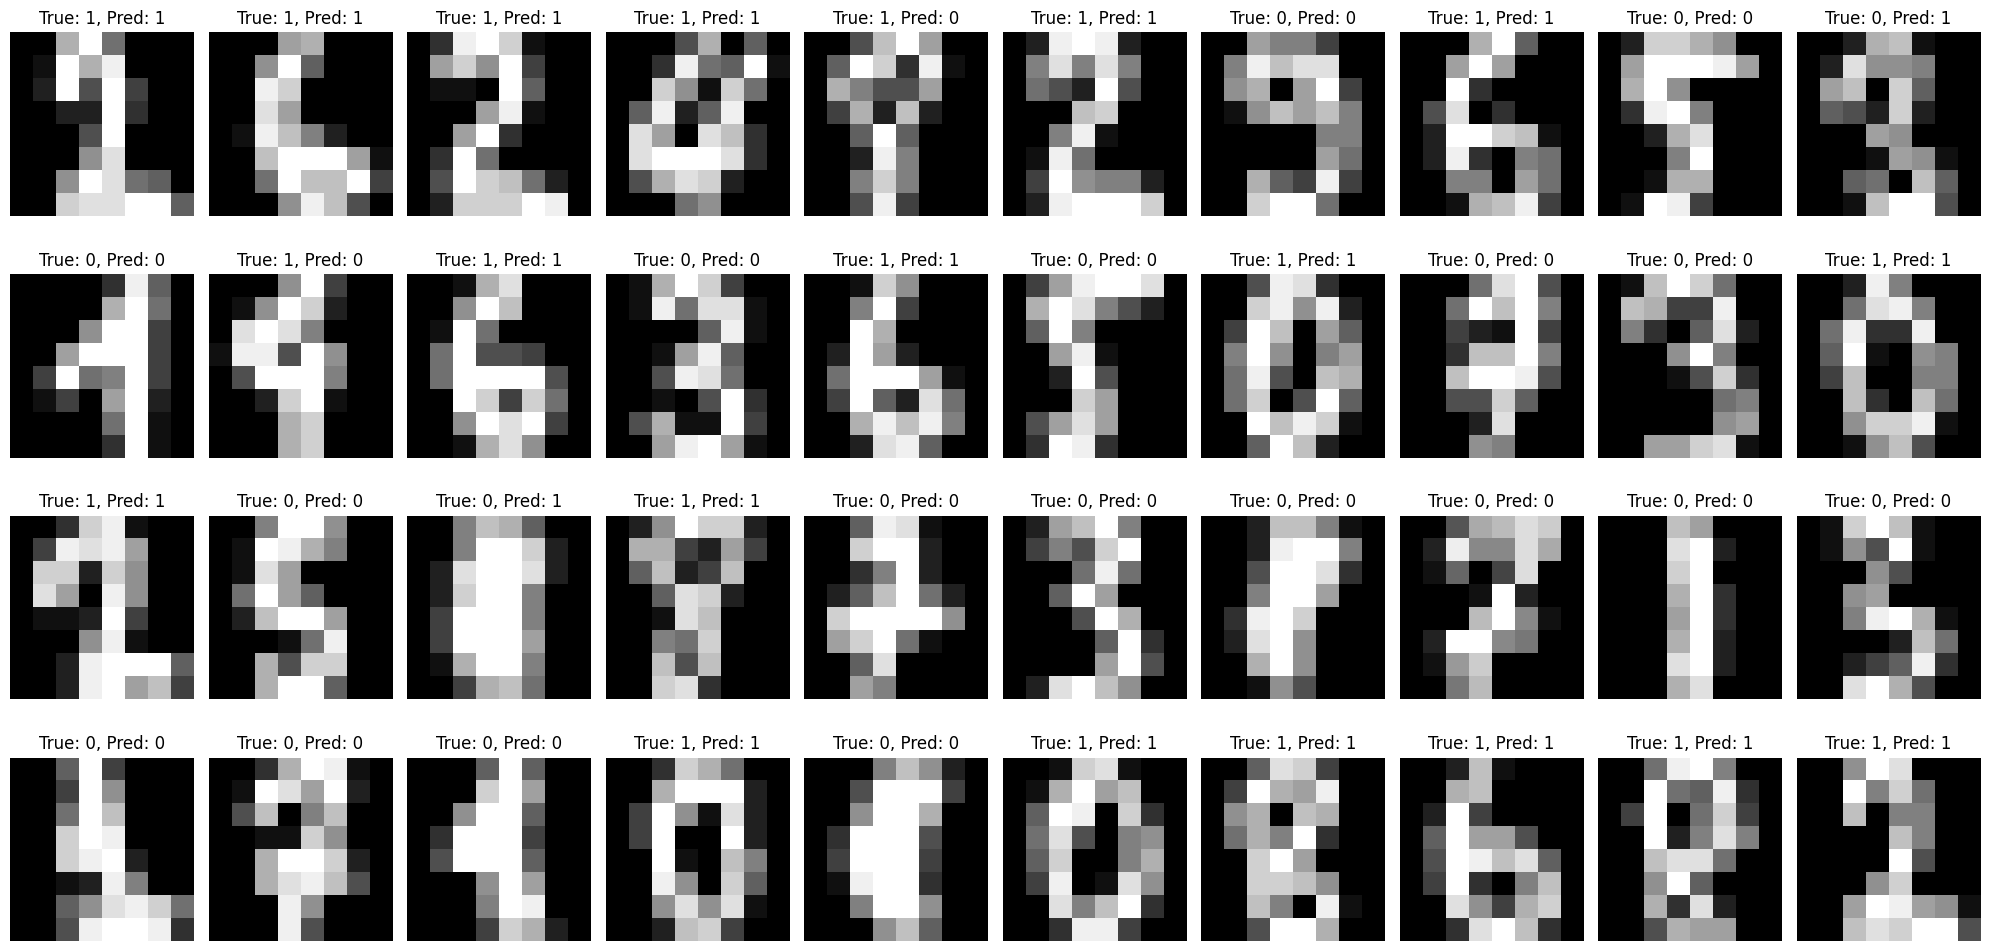

In [ ]:
correct_matrix_show(X_test, y_test, y_pred_bin)

3) бинарной классификации на '0' и остальные цифры (приведите примеры, когда классификатор ошибается),

In [ ]:
y_n_clf = np.where(y == 0, 1, 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_n_clf, test_size = 0.3, random_state = 82)

In [ ]:
clf_n = MLPClassifier(max_iter = 300, random_state = 82)
clf_n.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=82)

In [ ]:
y_pred_n = clf_n.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_n))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       1.00      0.98      0.99        64

    accuracy                           1.00       540
   macro avg       1.00      0.99      1.00       540
weighted avg       1.00      1.00      1.00       540



In [ ]:
print(confusion_matrix(y_test, y_pred_n))

[[476   0]
 [  1  63]]


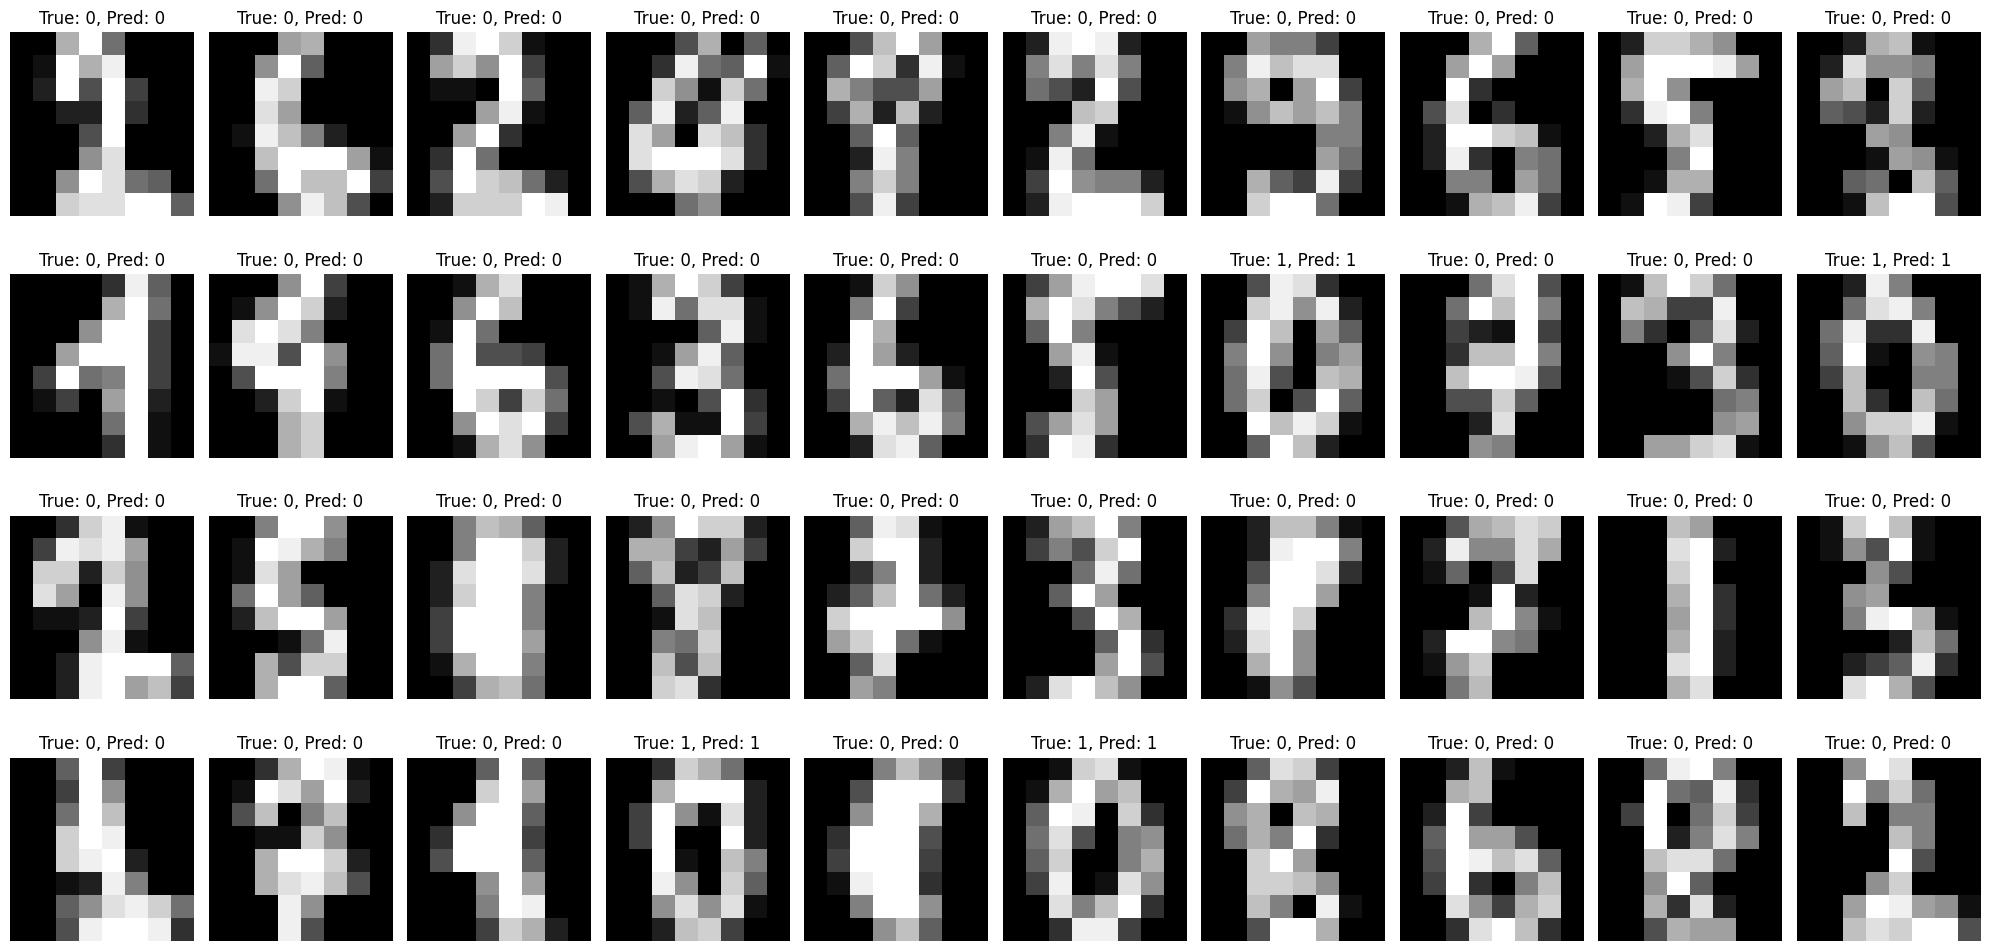

In [ ]:
correct_matrix_show(X_test, y_test, y_pred_n)

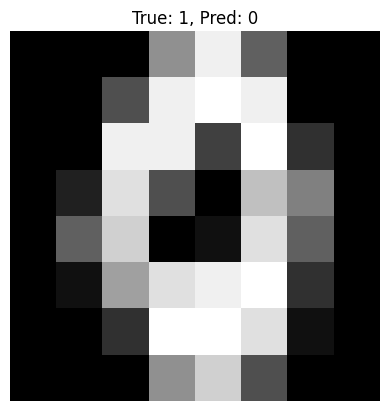

In [ ]:
incorrect_indices = np.where(y_pred_n != y_test)[0]
for i in incorrect_indices[:5]:
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f'True: {y_test[i]}, Pred: {y_pred_n[i]}')
    plt.axis('off')
    plt.show()

4) проиллюстрируйте советы по использованию (например, для первого совета можно на маленьком наборе цифр сравнить результаты без нормализации, с использованием MinMaxScaler и с использованием StandardScaler).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 82)

In [ ]:
#Без нормализации

In [ ]:
clf = MLPClassifier(max_iter = 300, random_state = 82)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=82)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.92      1.00      0.96        55
           2       1.00      0.98      0.99        52
           3       1.00      0.95      0.97        57
           4       0.98      1.00      0.99        41
           5       0.97      0.98      0.97        57
           6       1.00      1.00      1.00        50
           7       0.92      0.98      0.95        49
           8       0.96      0.89      0.92        61
           9       0.96      0.94      0.95        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[63  0  0  0  1  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  1  0  0]
 [ 0  0  0 54  0  1  0  2  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  1]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 1  5  0  0  0  1  0  0 54  0]
 [ 0  0  0  0  0  0  0  1  2 51]]


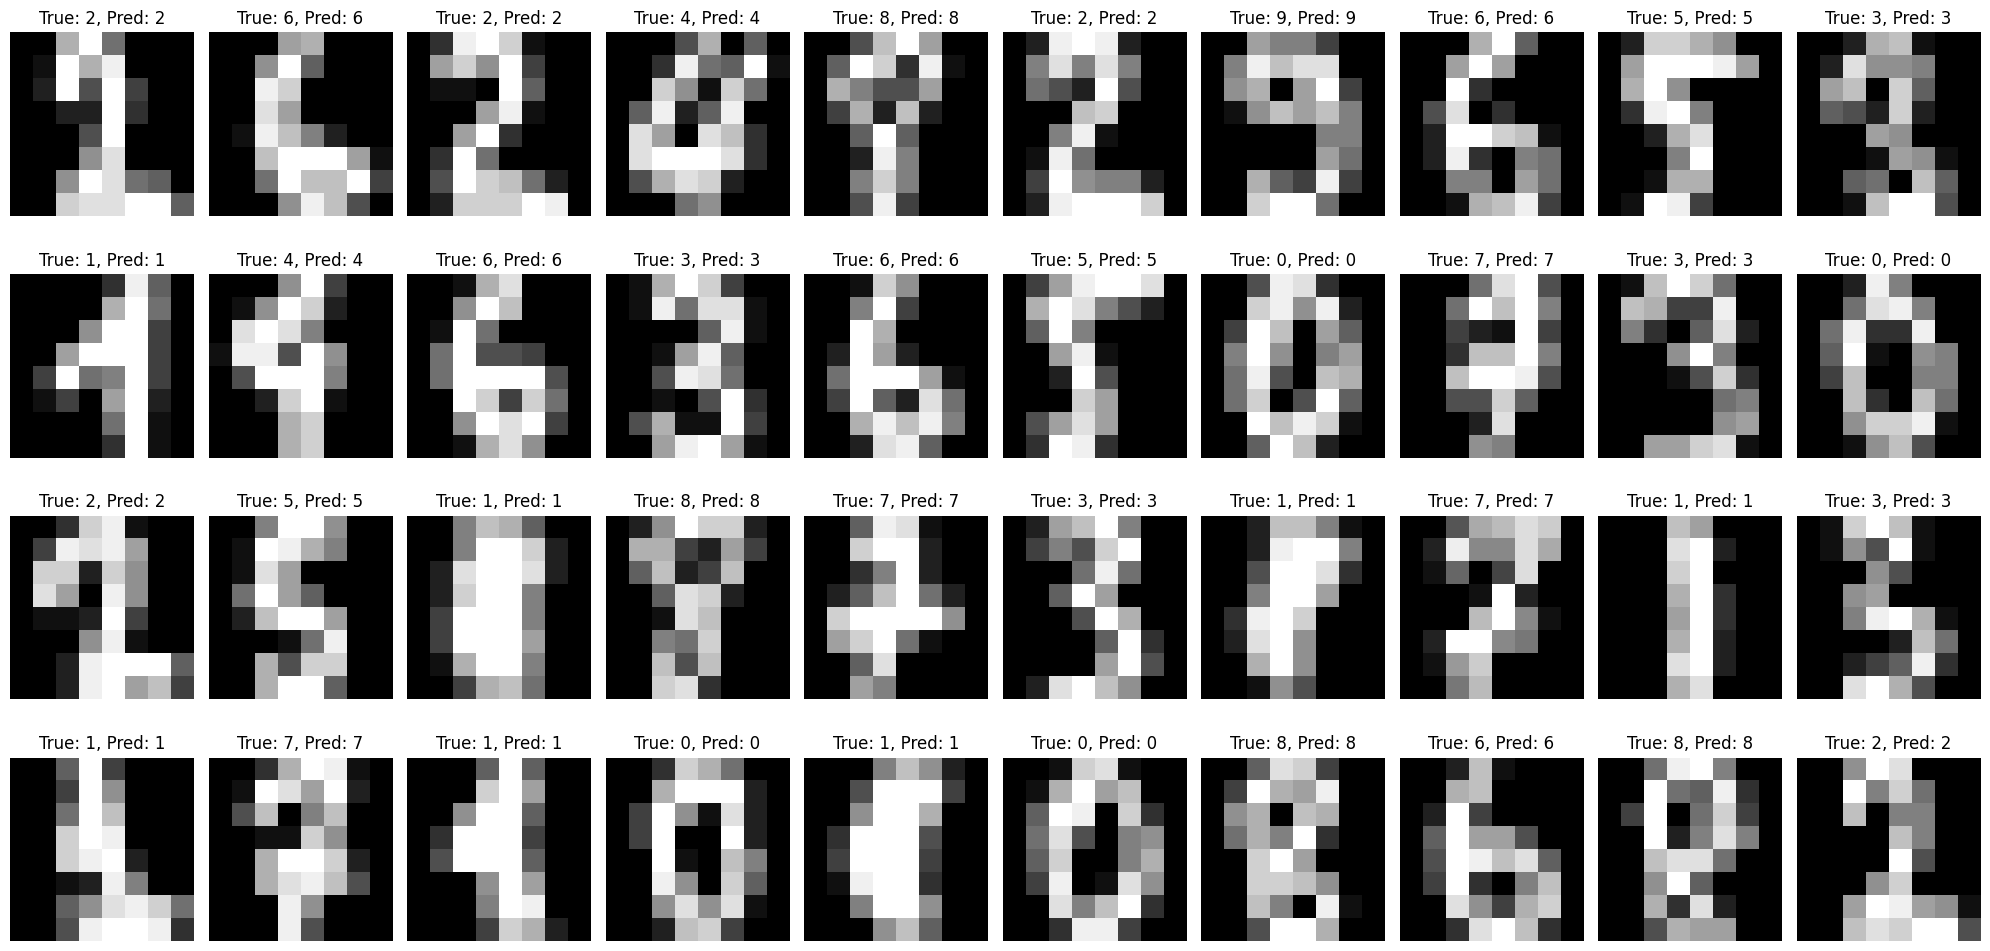

In [ ]:
correct_matrix_show(X_test, y_test, y_pred)

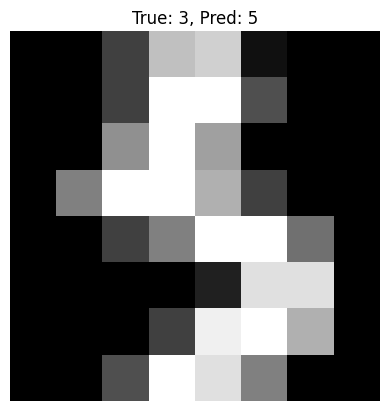

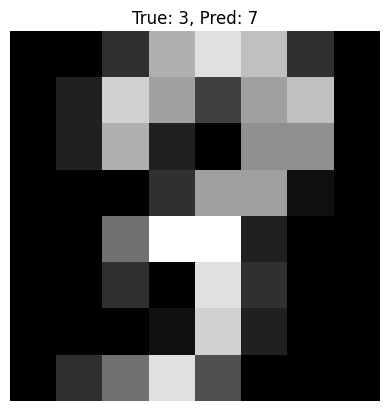

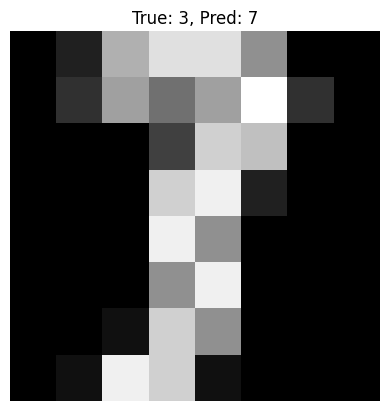

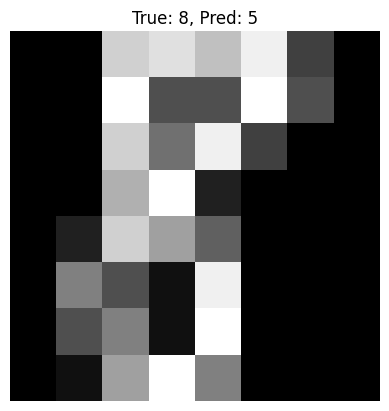

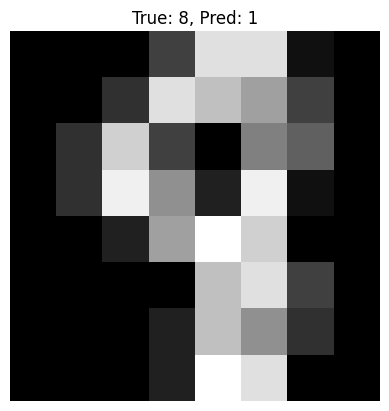

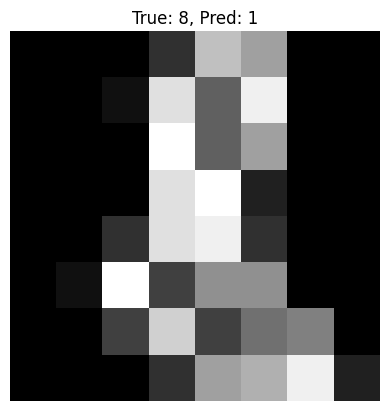

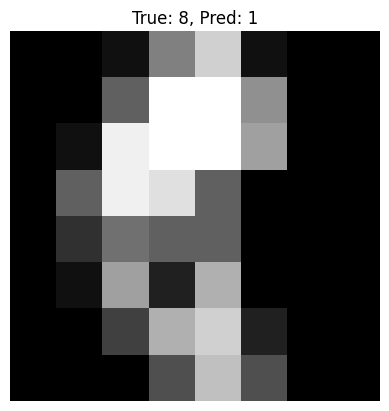

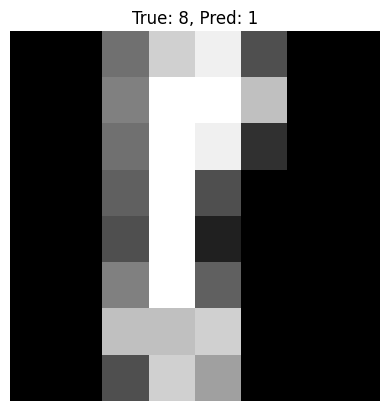

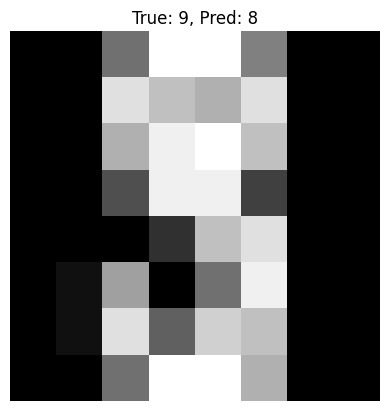

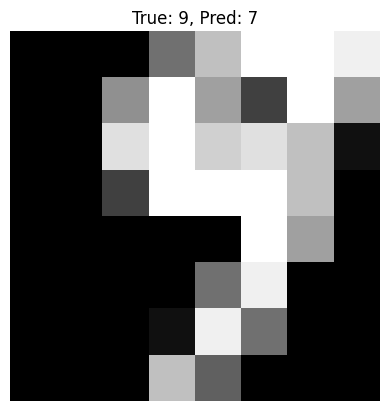

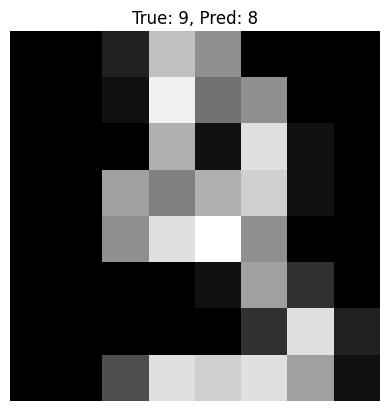

In [ ]:
for i in [3,8,9]:
  incorrect_indices_show(i,X_test, y_test, y_pred,8)

In [ ]:
#MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_MinMaxScaler = scaler.fit_transform(X_train)
X_test_MinMaxScaler = scaler.fit_transform(X_test)

In [ ]:
X_train_MinMaxScaler

array([[0.    , 0.    , 0.125 , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.125 , 0.8125, ..., 1.    , 1.    , 0.    ],
       ...,
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.875 , 0.    , 0.    ]])

In [ ]:
clf_MinMaxScaler = MLPClassifier(max_iter = 300, random_state = 82)
clf_MinMaxScaler.fit(X_train_MinMaxScaler, y_train)

MLPClassifier(max_iter=300, random_state=82)

In [ ]:
y_pred_MinMaxScaler = clf_MinMaxScaler.predict(X_test_MinMaxScaler)

In [ ]:
print(classification_report(y_test, y_pred_MinMaxScaler))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.92      1.00      0.96        55
           2       0.98      1.00      0.99        52
           3       0.98      0.95      0.96        57
           4       0.98      0.98      0.98        41
           5       0.93      0.98      0.96        57
           6       1.00      1.00      1.00        50
           7       0.98      0.98      0.98        49
           8       1.00      0.89      0.94        61
           9       0.95      0.96      0.95        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [ ]:
print(confusion_matrix(y_test, y_pred_MinMaxScaler)) #Стал чуть лучше распознавать цифру 8, но стал больше ошибаться на цифре 3.

[[63  0  0  0  1  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  3  0  0  0  0]
 [ 0  1  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  1]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 0  4  1  0  0  1  0  0 54  1]
 [ 0  0  0  1  0  0  0  1  0 52]]


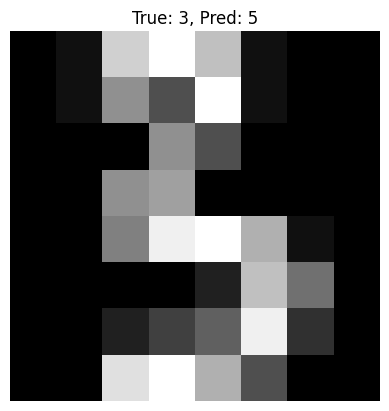

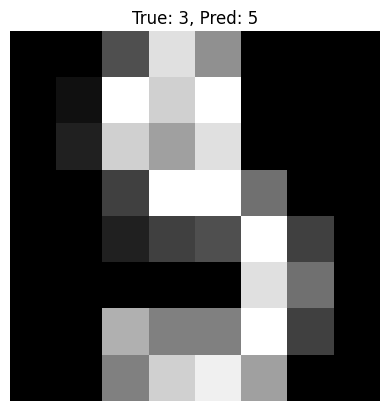

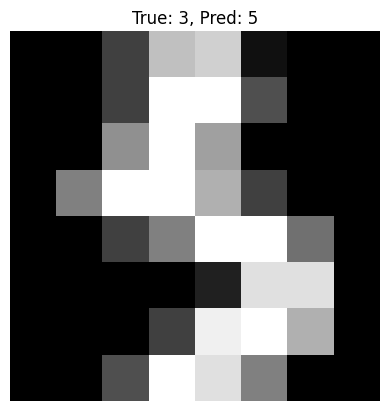

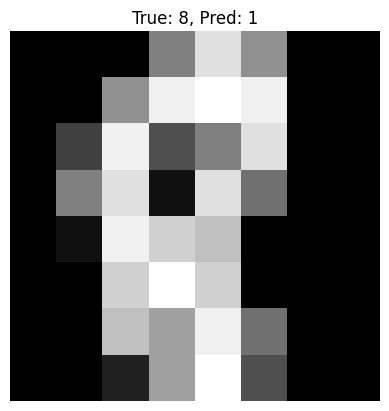

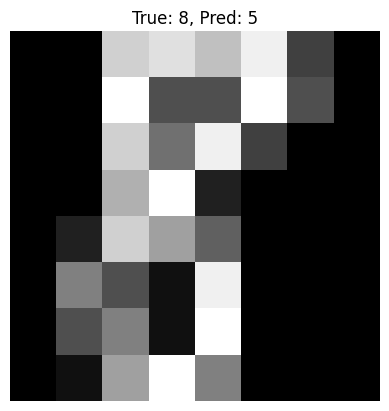

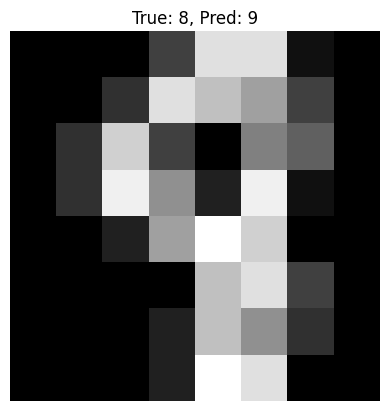

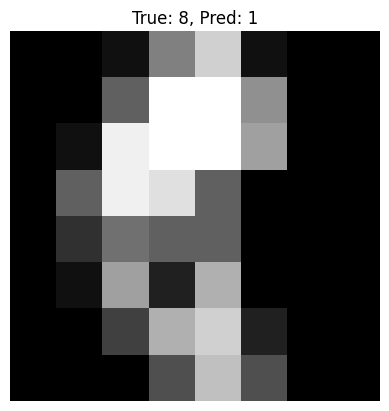

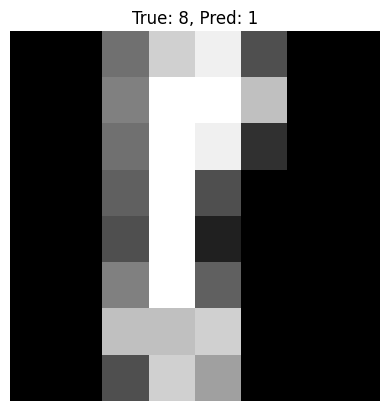

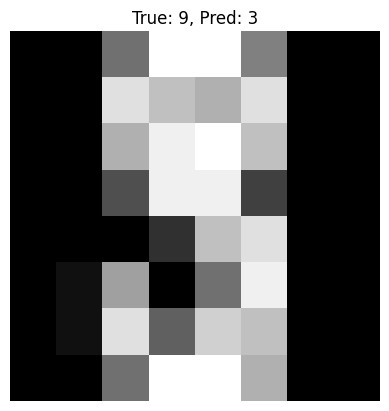

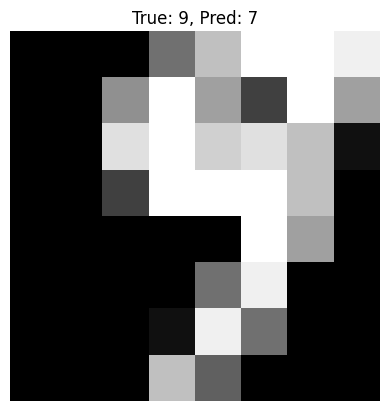

In [ ]:
for i in [3,8,9]:
  incorrect_indices_show(i,X_test, y_test, y_pred_MinMaxScaler,8)

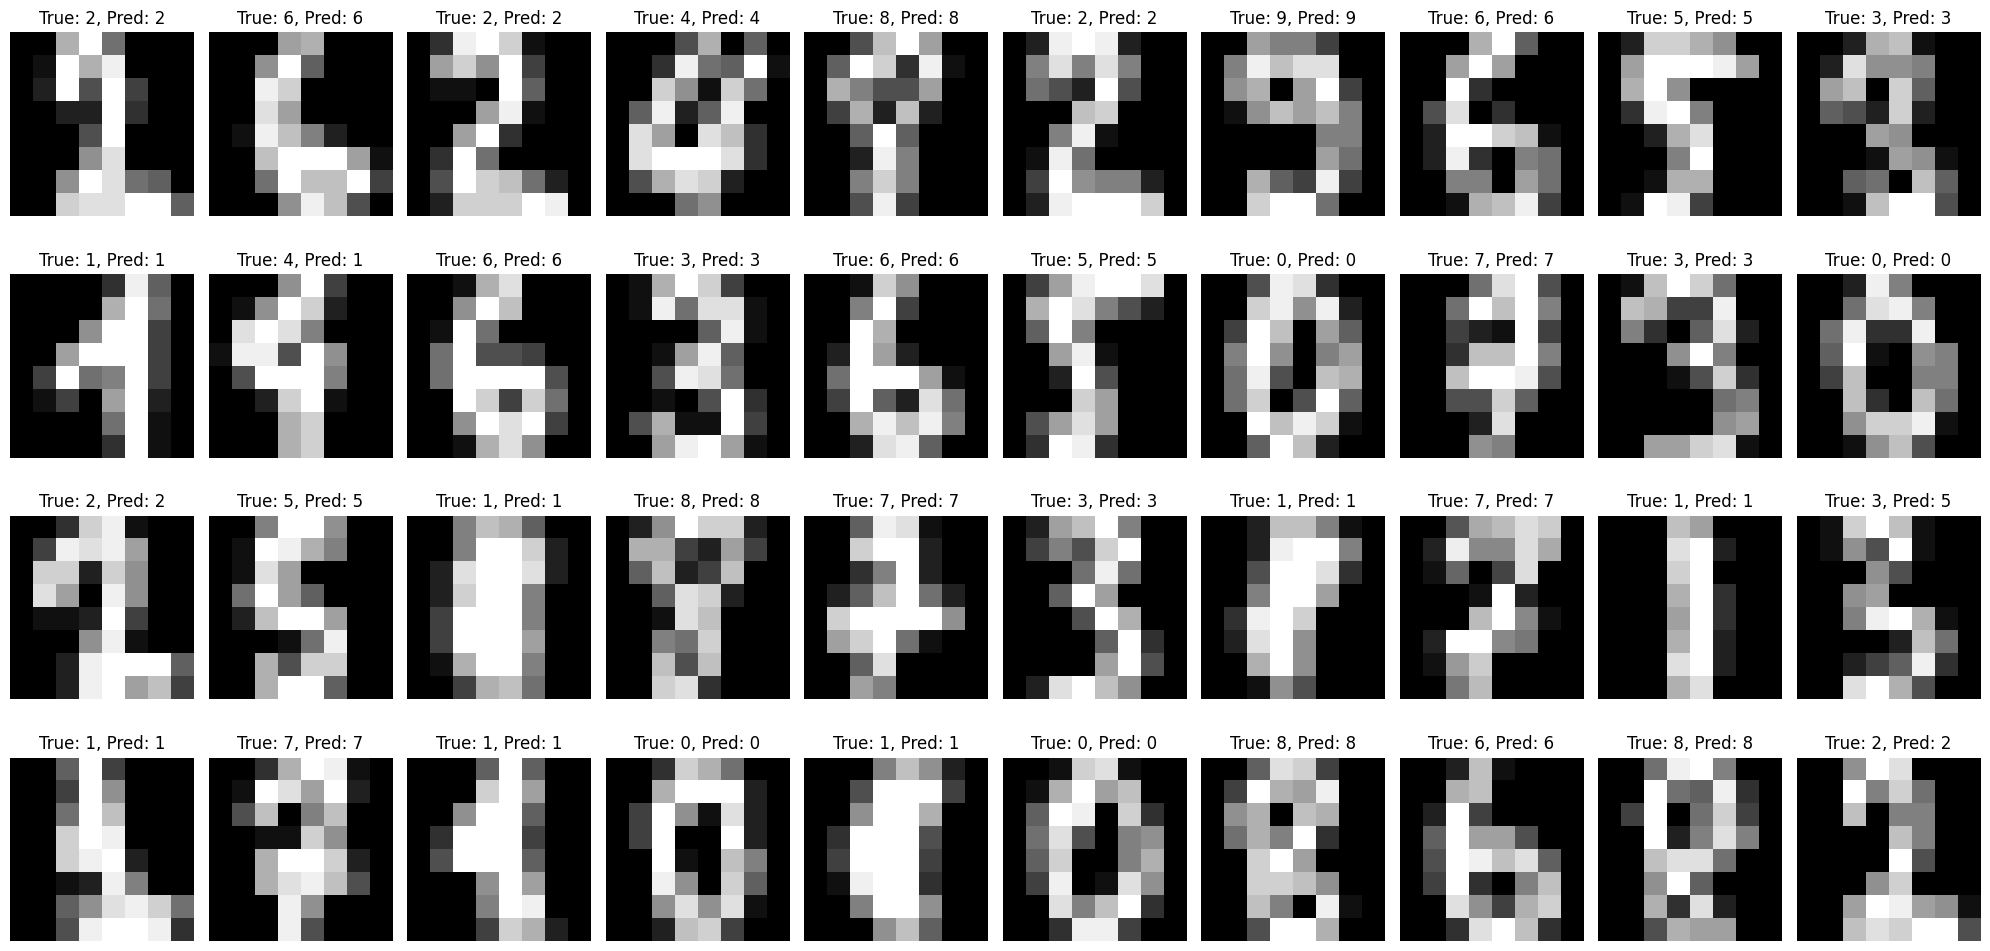

In [ ]:
correct_matrix_show(X_test, y_test, y_pred_MinMaxScaler)

In [ ]:
#StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_StandardScaler = scaler.fit_transform(X_train)
X_test_StandardScaler = scaler.fit_transform(X_test)

In [ ]:
clf_StandardScaler = MLPClassifier(max_iter = 300, random_state = 82)
clf_StandardScaler.fit(X_train_StandardScaler, y_train)

MLPClassifier(max_iter=300, random_state=82)

In [ ]:
y_pred_StandardScaler = clf_StandardScaler.predict(X_test_StandardScaler)

In [ ]:
print(classification_report(y_test, y_pred_StandardScaler))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.90      1.00      0.95        55
           2       0.98      1.00      0.99        52
           3       1.00      0.93      0.96        57
           4       0.98      0.98      0.98        41
           5       0.97      0.98      0.97        57
           6       1.00      1.00      1.00        50
           7       0.94      0.98      0.96        49
           8       0.98      0.90      0.94        61
           9       0.96      0.96      0.96        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [ ]:
print(confusion_matrix(y_test, y_pred_StandardScaler)) # Как-будто ничего не поменялось.

[[63  0  0  0  1  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  2  0  2  0  0]
 [ 0  1  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  1]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 0  5  1  0  0  0  0  0 55  0]
 [ 0  0  0  0  0  0  0  1  1 52]]


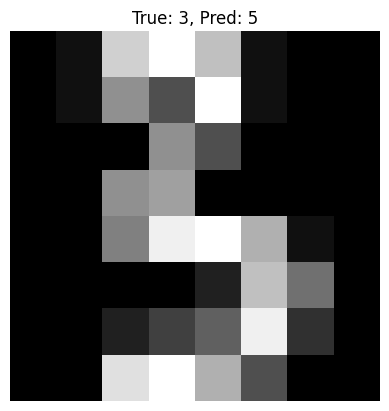

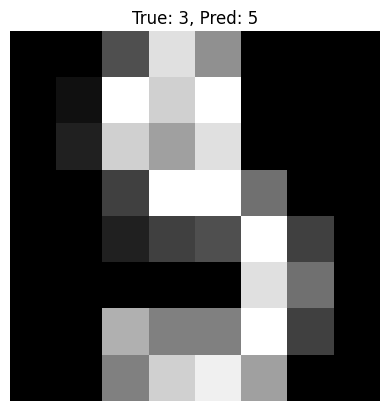

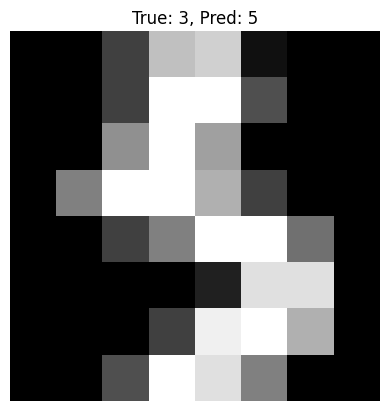

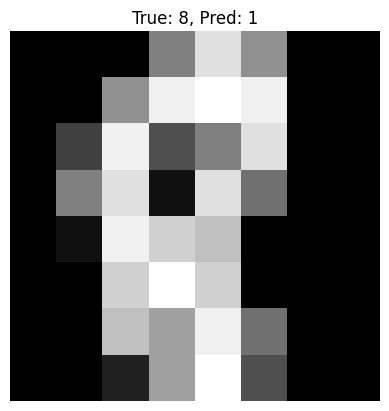

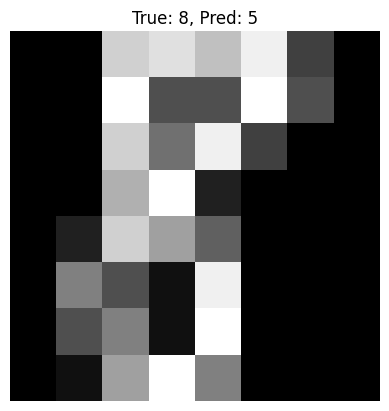

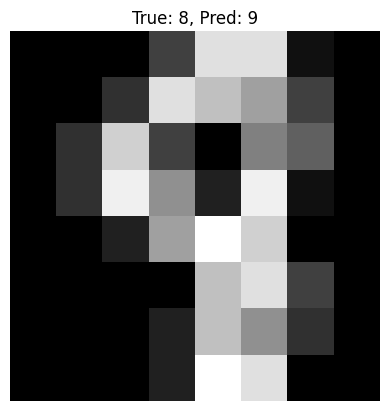

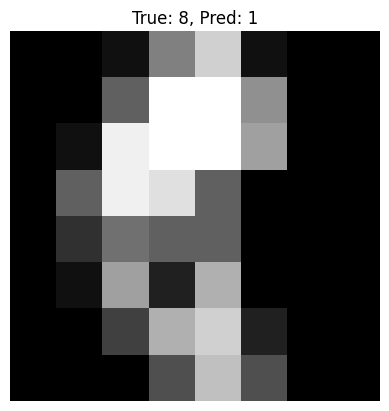

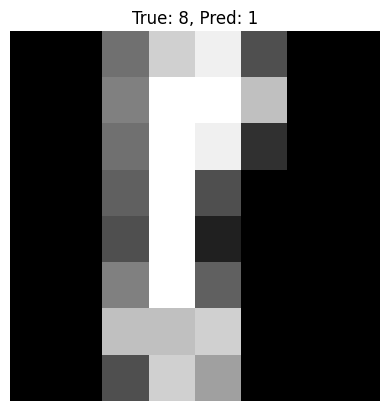

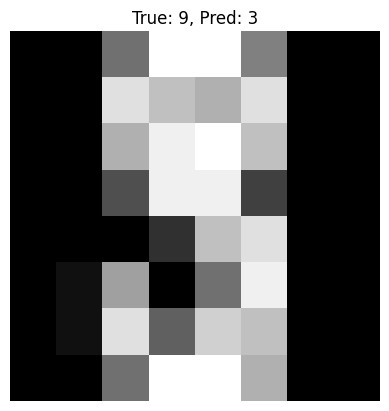

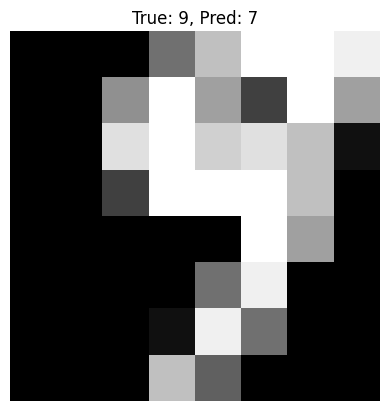

In [ ]:
for i in [3,8,9]:
  incorrect_indices_show(i,X_test, y_test, y_pred_MinMaxScaler,8)

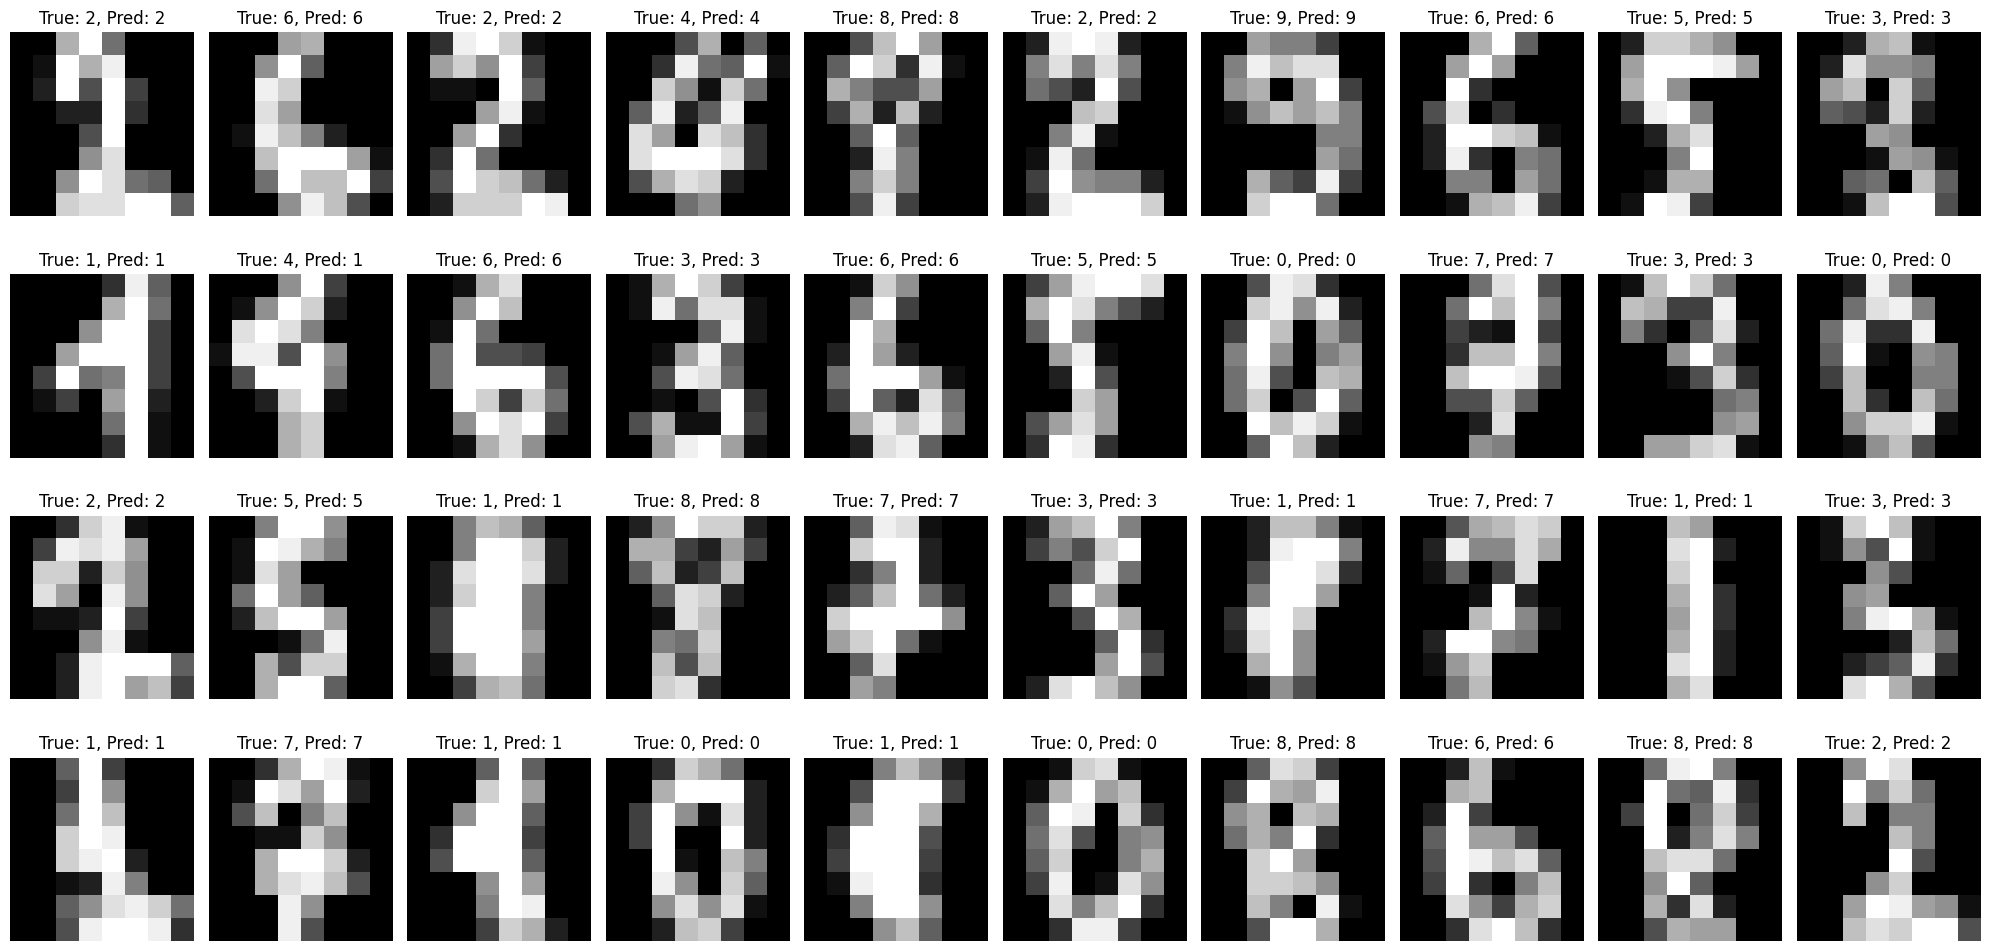

In [ ]:
correct_matrix_show(X_test, y_test, y_pred_StandardScaler)

#Второй набор данных

In [ ]:
# загружаем датасет второго набора
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [ ]:
y = np.array(y, dtype=int)

1) обучение и работу многоклассовой классификации,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 82)

In [ ]:
clf = MLPClassifier(max_iter = 100, random_state = 82)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=100, random_state=82)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2014
           1       0.98      0.98      0.98      2355
           2       0.95      0.97      0.96      2007
           3       0.95      0.96      0.95      2207
           4       0.95      0.97      0.96      2006
           5       0.96      0.95      0.96      1851
           6       0.97      0.98      0.98      2144
           7       0.96      0.97      0.97      2234
           8       0.95      0.93      0.94      2087
           9       0.96      0.93      0.94      2095

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1953    1    6    2    1   11   18    4    8   10]
 [   0 2316   13    3    4    0    6    3    9    1]
 [   5    6 1937   18    4    1    3   23    9    1]
 [   1    2   25 2112    1   20    2   10   25    9]
 [   1    6    6    2 1939    0    6    6    7   33]
 [   2    3    3   26    5 1766   17    5   16    8]
 [   5    1    4    2   19   10 2100    0    3    0]
 [   1   11   16    0    7    2    2 2177    6   12]
 [   4   17   26   38    8   17    6    7 1947   17]
 [   5    2    0   22   50    6    1   39   18 1952]]


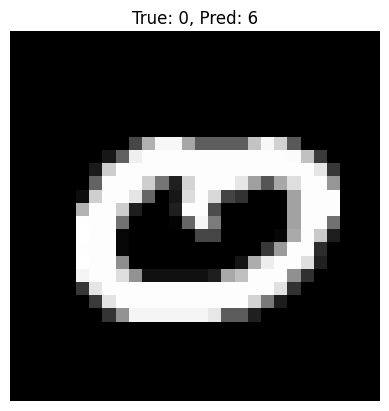

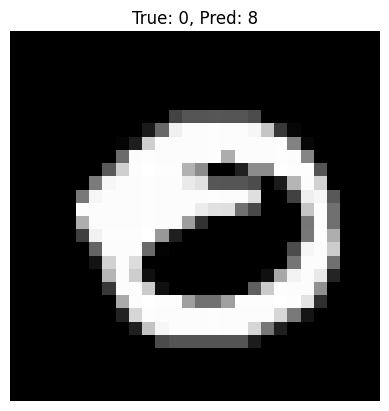

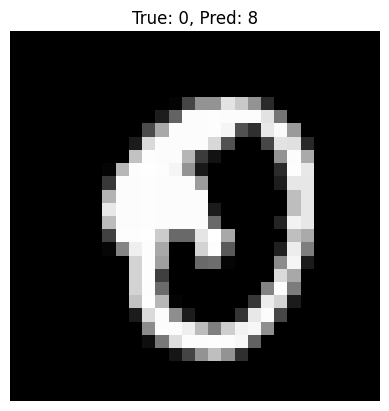

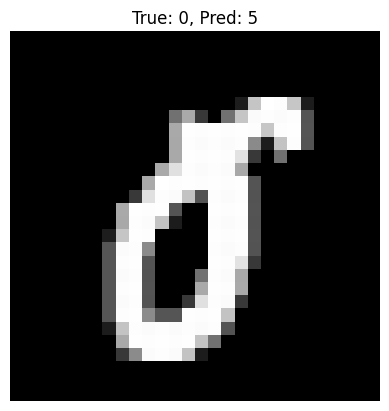

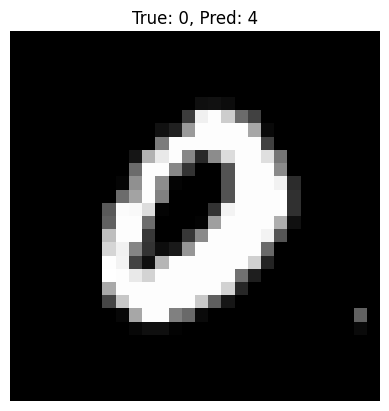

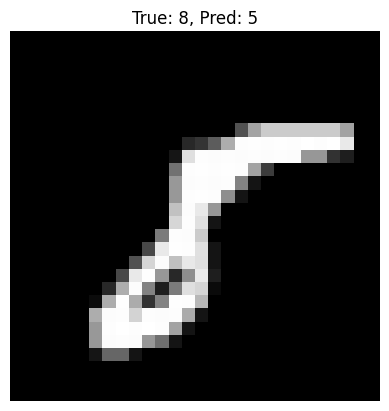

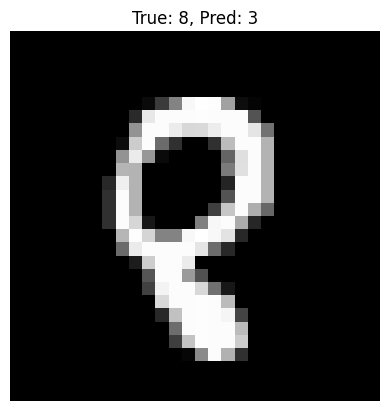

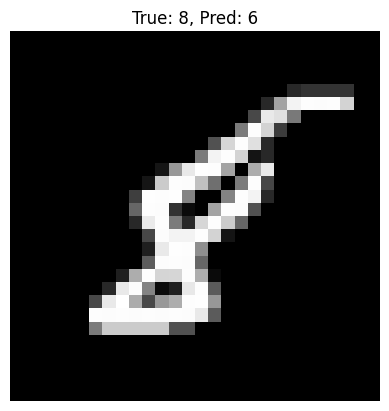

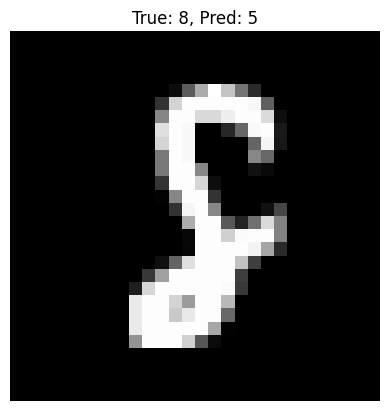

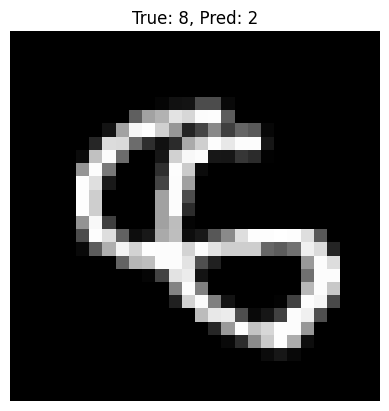

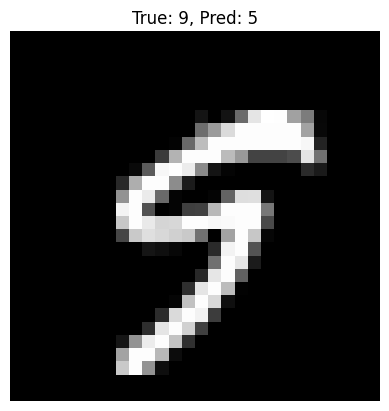

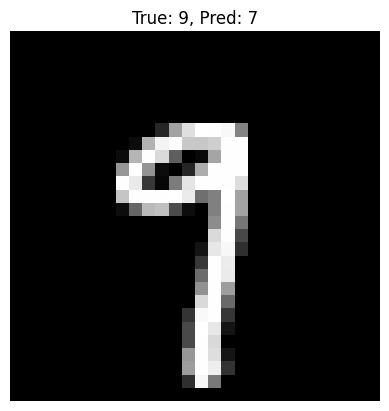

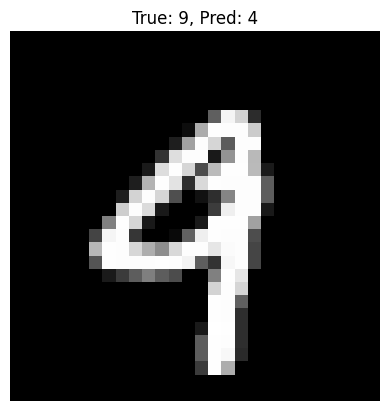

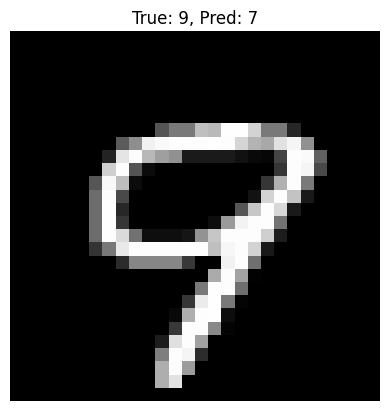

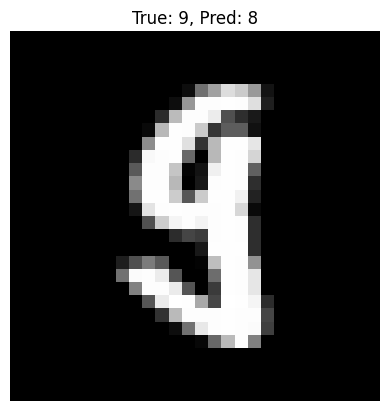

In [ ]:
for i in [0,8,9]:
  incorrect_indices_show(i,X_test, y_test, y_pred,28)

2) бинарной классификации на чётные и нечётные цифры,

In [ ]:
y_bin_clf = np.where(y % 2 == 0, 1, 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin_clf, test_size = 0.3, random_state = 82)

In [ ]:
clf_bin_2 = MLPClassifier(max_iter = 100, random_state = 82)
clf_bin_2.fit(X_train, y_train)

MLPClassifier(max_iter=100, random_state=82)

In [ ]:
y_pred_bin = clf_bin_2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_bin))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10742
           1       0.98      0.99      0.98     10258

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



In [ ]:
print(confusion_matrix(y_test, y_pred_bin))

[[10533   209]
 [  130 10128]]


3) бинарной классификации на '0' и остальные цифры (приведите примеры, когда классификатор ошибается),

In [ ]:
y_n = np.where(y == 0, 1, 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_n, test_size = 0.3, random_state = 82)

In [ ]:
clf_n_2 = MLPClassifier(max_iter = 100, random_state = 82)
clf_n_2.fit(X_train, y_train)

MLPClassifier(max_iter=100, random_state=82)

In [ ]:
y_pred_n_2 = clf_n_2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_n_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18986
           1       0.99      0.98      0.99      2014

    accuracy                           1.00     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       1.00      1.00      1.00     21000



In [ ]:
print(confusion_matrix(y_test, y_pred_n_2))

[[18968    18]
 [   42  1972]]


4) проиллюстрируйте советы по использованию (например, для первого совета можно на маленьком наборе цифр сравнить результаты без нормализации, с использованием MinMaxScaler и с использованием StandardScaler).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 82)

In [ ]:
#MinMaxScaler

In [ ]:
scaler1 = MinMaxScaler()
X_train_MinMaxScaler = scaler1.fit_transform(X_train)
X_test_MinMaxScaler = scaler1.fit_transform(X_test)

In [ ]:
clf_MinMaxScaler = MLPClassifier(max_iter = 100, random_state = 82)
clf_MinMaxScaler.fit(X_train_MinMaxScaler, y_train)

MLPClassifier(max_iter=100, random_state=82)

In [ ]:
y_pred_MinMaxScaler = clf_MinMaxScaler.predict(X_test_MinMaxScaler)

In [ ]:
print(classification_report(y_test, y_pred_MinMaxScaler))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2014
           1       0.99      0.99      0.99      2355
           2       0.98      0.97      0.98      2007
           3       0.97      0.97      0.97      2207
           4       0.97      0.98      0.98      2006
           5       0.97      0.98      0.97      1851
           6       0.98      0.99      0.98      2144
           7       0.98      0.98      0.98      2234
           8       0.97      0.97      0.97      2087
           9       0.98      0.96      0.97      2095

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000



In [ ]:
print(confusion_matrix(y_test, y_pred_MinMaxScaler)) # Значительно лучше стал распознавать цифры, но всё ещё плохо распознаёт цифры 3,8,9.

[[1978    0    2    1    0    5   16    4    6    2]
 [   0 2334    4    5    4    0    2    2    2    2]
 [   8    4 1955    4    4    3    5   12    9    3]
 [   0    0   12 2146    0   21    0    9   15    4]
 [   2    4    3    1 1971    2    4    3    2   14]
 [   0    1    2   18    2 1808    9    1    5    5]
 [   4    1    1    0    6    6 2122    0    4    0]
 [   0    7   12    6    6    2    1 2183    6   11]
 [   5   11    3   13    5   13    8    3 2018    8]
 [   6    4    0    9   27   12    1   11    8 2017]]


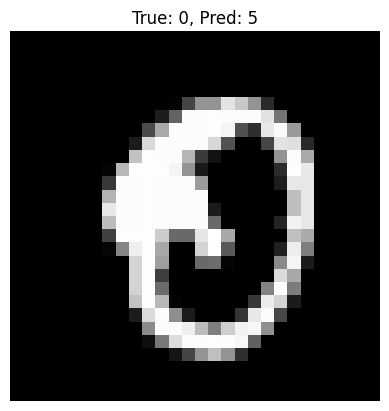

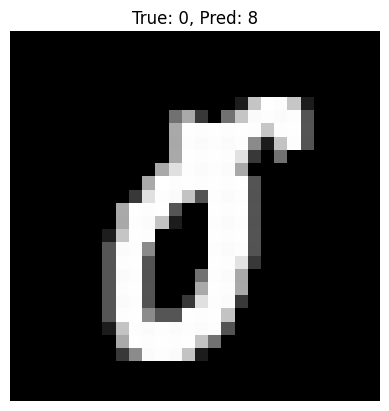

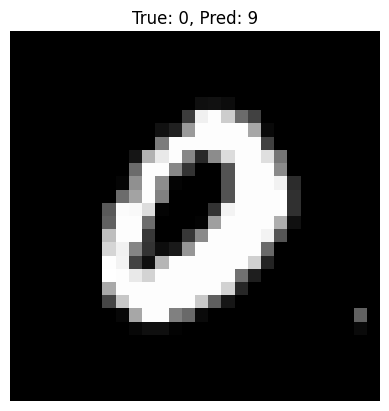

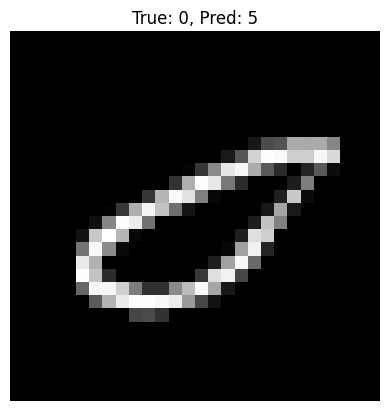

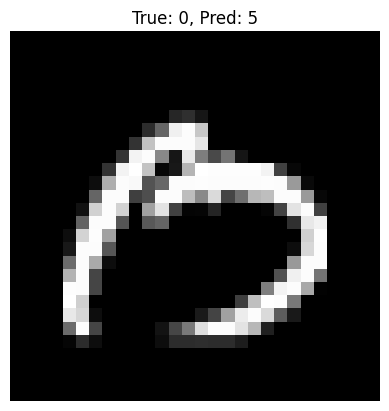

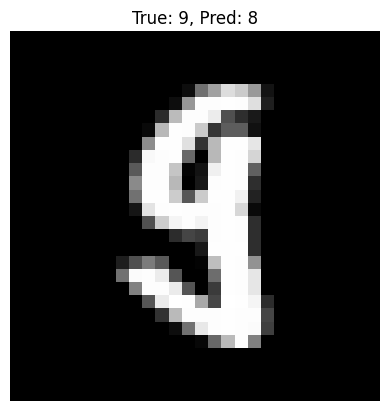

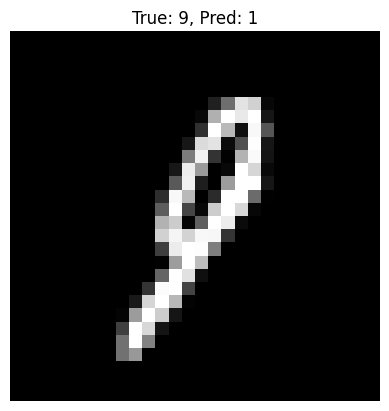

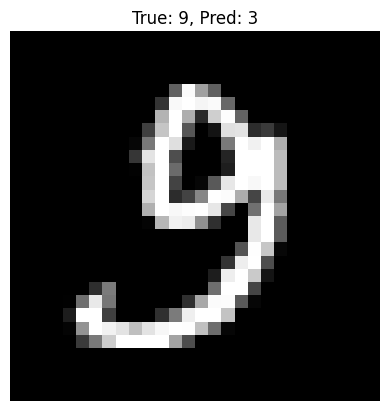

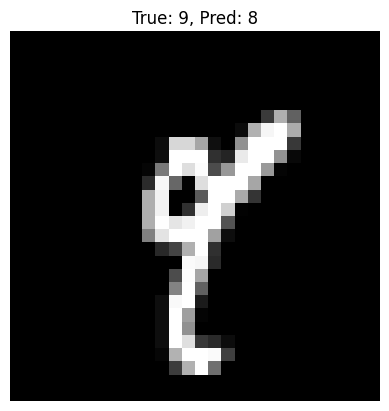

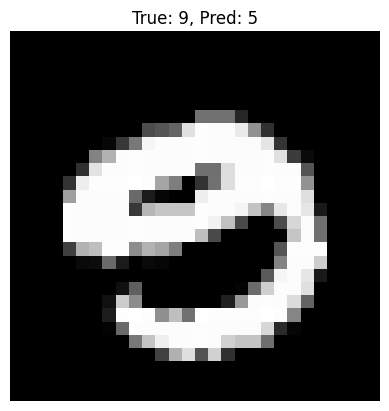

In [ ]:
for i in [0,9]:
  incorrect_indices_show(i,X_test, y_test, y_pred_MinMaxScaler,28)

In [ ]:
#StandardScaler

In [ ]:
scaler2 = StandardScaler()
X_train_StandardScaler = scaler2.fit_transform(X_train)
X_test_StandardScaler = scaler2.fit_transform(X_test)

In [ ]:
clf_StandardScaler = MLPClassifier(max_iter = 100, random_state = 82)
clf_StandardScaler.fit(X_train_StandardScaler, y_train)

MLPClassifier(max_iter=100, random_state=82)

In [ ]:
y_pred_StandardScaler = clf_StandardScaler.predict(X_test_StandardScaler)

In [ ]:
print(classification_report(y_test, y_pred_StandardScaler))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2014
           1       0.99      0.99      0.99      2355
           2       0.97      0.97      0.97      2007
           3       0.97      0.97      0.97      2207
           4       0.97      0.98      0.97      2006
           5       0.96      0.97      0.97      1851
           6       0.98      0.98      0.98      2144
           7       0.98      0.97      0.97      2234
           8       0.97      0.95      0.96      2087
           9       0.97      0.97      0.97      2095

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [ ]:
print(confusion_matrix(y_test, y_pred_StandardScaler)) # Результаты хуже чем при MinMax

[[1983    0    3    0    0    5   11    4    5    3]
 [   0 2327    7    6    3    2    2    3    4    1]
 [   8    6 1949   12    5    5    4    6    9    3]
 [   1    2   16 2130    0   22    2   13   15    6]
 [   0    5    6    1 1956    2    8    5    3   20]
 [   4    2    2   17    4 1791   10    3   13    5]
 [  13    1    4    0    9    7 2105    1    4    0]
 [   0    8   12    5    8    4    1 2175    3   18]
 [   6    9   11   17    9   12   12    7 1992   12]
 [   6    2    2    9   20    9    0   12    6 2029]]


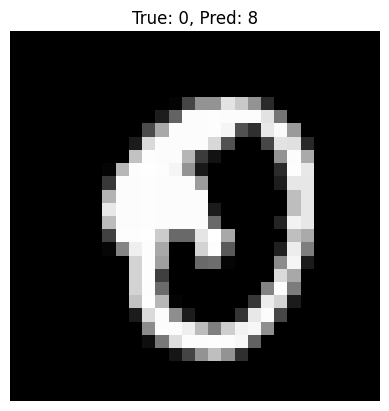

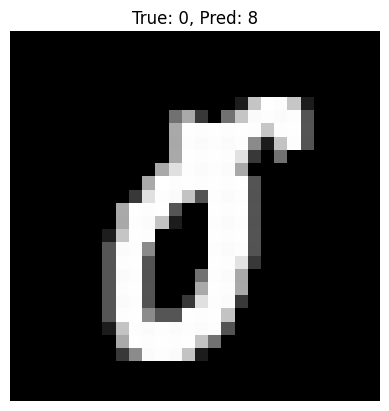

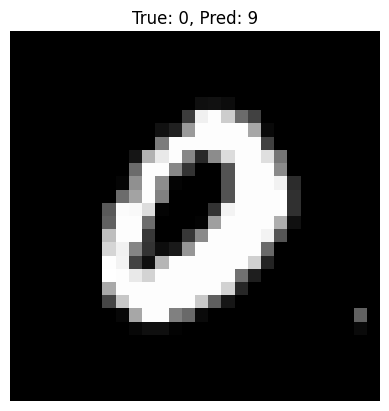

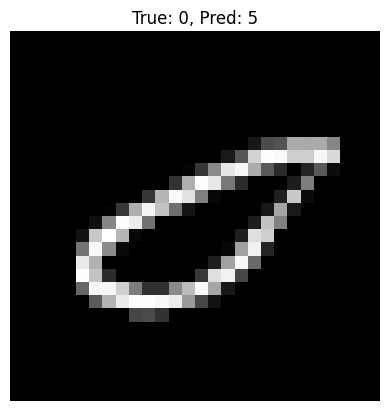

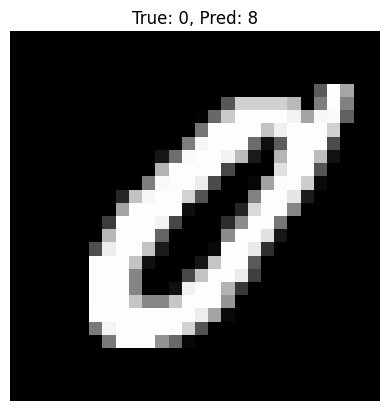

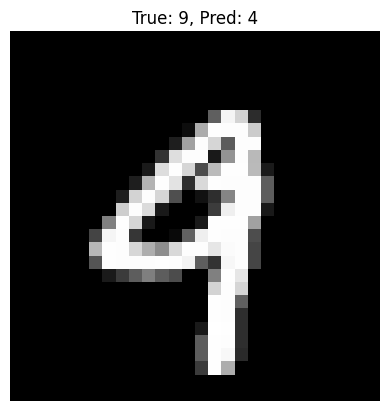

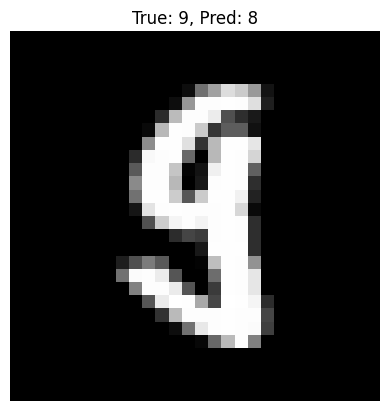

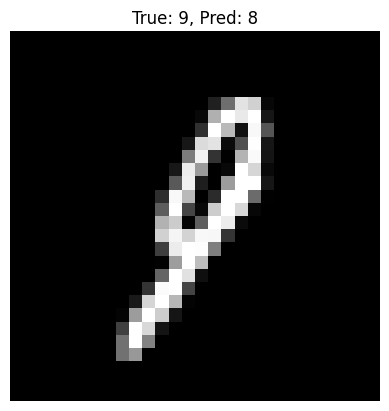

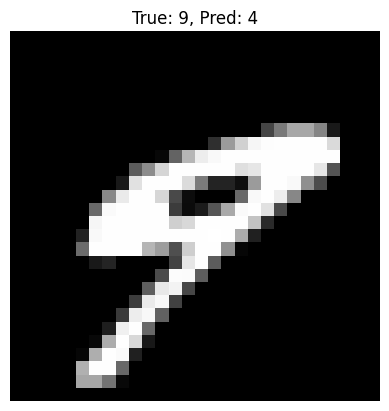

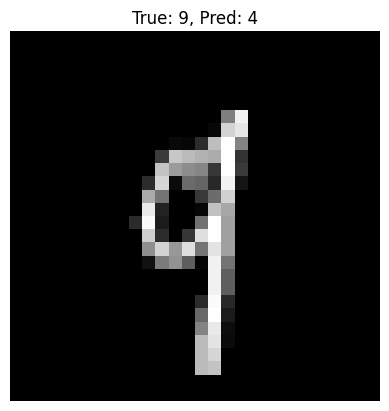

In [ ]:
for i in [0,9]:
  incorrect_indices_show(i,X_test, y_test, y_pred_StandardScaler,28)